<a href="https://colab.research.google.com/github/ChristopherHamian/Coursera_Capstone/blob/master/Rumble_Predictive_Model(Sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#############################################################################################

# MODEL TRAINING AND EVALUATION FOR PREDICTIVE MODEL

# ******PORTIONS OF CODE AND DATASET ARE EXCLUDED TO PROTECT COMPANY PRIVACY******

#############################################################################################

In [29]:
#########################################################
# IMPORTS NECESSARY FOR THE SCRIPT           
#########################################################
import pandas as pd
import numpy as np
import time
import datetime
from datetime import timedelta
import statistics
import matplotlib.pyplot as plt
import random
import os
import math
from dateutil.relativedelta import relativedelta

In [ ]:
############################################################
# UNCOMMENT THE CODE BELOW IF YOU WANT TO USE TRAINER STATS           
############################################################
filter = 'TRAINER'
from google.colab import files
import io
uploaded = files.upload()
filter_length = pd.read_csv(io.StringIO(uploaded['trainers.csv'].decode('utf-8'))) 
filter_length = len(filter_length)

In [ ]:
uploaded = files.upload()
stats_filter = pd.read_csv(io.StringIO(uploaded['stats('+ filter +')(TOTAL).csv'].decode('utf-8'))) 

In [ ]:
uploaded = files.upload()
stats_monthly = pd.read_csv(io.StringIO(uploaded['monthly-stats(TOTAL).csv'].decode('utf-8'))) 

In [ ]:
############################################################
# UNCOMMENT THE CODE BELOW IF YOU WANT TO USE TOTAL DATASET           
############################################################

paid = 0
uploaded = files.upload()
dataset_path = "monthly_first_timers(TOTAL).txt"
data = uploaded[dataset_path].decode("utf-8")

with open(dataset_path, "r") as f:      ##### READS THE NUMBER OF MONTHLY FIRST TIMERS 
    customers_text = f.read()                                ##### STORES IN ARRAY: FIRST_TIMERS_MONTHLY
    first_timers_monthly = [ float(x) for x in customers_text.split() ]


In [ ]:
uploaded = files.upload()
dataset_path = "actual_monthly_count(TOTAL).txt"
data = uploaded[dataset_path].decode("utf-8")

with open(dataset_path, "r") as f:
    customers_text = f.read()                         #### READS THE ACTUAL NUMBER OF MONTHLY CUSTOMERS AND STORES IN ARRAY: ACTUAL_MONTHLY_COUNT
    actual_monthly_count = [ float(x) for x in customers_text.split() ]

In [12]:
############################################################
# TRANSFERS INFO FROM CSV FILE TO ARRAYS BY COLUMNS
# SHOULD NOT NEED TO TOUCH THIS CODE BLOCK
############################################################
group_1_percent_filter = stats_filter["CUSTOMER GROUP 1%"]#### PERCENTAGE OF GROUP 1 CLASS. PEOPLE USING MONTHLY-FILTER-STATS
group_2_percent_filter = stats_filter["CUSTOMER GROUP 2%"]#### PERCENTAGE OF GROUP 2 CLASS. PEOPLE USING MONTHLY-FILTER-STATS
group_3_percent_filter = stats_filter["CUSTOMER GROUP 3%"]#### PERCENTAGE OF GROUP 3 CLASS. PEOPLE USING MONTHLY-FILTER-STATS
group_4_percent_filter = stats_filter["CUSTOMER GROUP 4+%"]#### PERCENTAGE OF GROUP 4+ CLASS. PEOPLE USING MONTHLY-FILTER-STATS
group_2_avg_days_filter = stats_filter["AVG TIME 2 CLASSES"]#### AVERAGE DAYS BETWEEN 2 CLASSES. PEOPLE USING MONTHLY-FILTER-STATS
group_3_avg_days_filter = stats_filter["AVG TIME 3 CLASSES"]#### AVERAGE DAYS BETWEEN 3 CLASSES. PEOPLE USING MONTHLY-FILTER-STATS
group_4_avg_days_filter = stats_filter["AVG TIME 4+ CLASSES"]#### AVERAGE DAYS BETWEEN 4+ CLASSES. PEOPLE USING MONTHLY-FILTER-STATS
group_4_avg_classes_filter = stats_filter["AVG NUMBER 4+ CLASSES"]#### AVERAGE # OF 4+ CLASSES USING MONTHLY-FILTER-STAT
filter_percent = stats_filter[filter + ' Percent'] #### FILTER PERCENT FOR MONTHLY-FILTER STATS
############################################################
# TRANSFERS INFO FROM CSV FILE TO ARRAYS BY COLUMNS
# SHOULD NOT NEED TO TOUCH THIS CODE BLOCK
############################################################
group_1_percent_month = stats_monthly["CUSTOMER GROUP 1%"]
group_2_percent_month = stats_monthly["CUSTOMER GROUP 2%"]
group_3_percent_month = stats_monthly["CUSTOMER GROUP 3%"]
group_4_percent_month = stats_monthly["CUSTOMER GROUP 4+%"] 
group_2_avg_days_month = stats_monthly["AVG TIME 2 CLASSES"]
group_3_avg_days_month = stats_monthly["AVG TIME 3 CLASSES"]
group_4_avg_days_month = stats_monthly["AVG TIME 4+ CLASSES"]
group_4_avg_classes_month = stats_monthly["AVG NUMBER 4+ CLASSES"]

In [13]:
############################################################
# GENERATES THE DATES FROM THE MONTHLY FIRST TIMERS
# USING **MONTHLY-FILTER** STATS
############################################################
last_full_month=len(actual_monthly_count)-2   #### THIS KEEPS TRACK OF THE LAST FULL MONTH OF DATA, FOR GRAPHING PURPOSES
start_date = datetime.datetime.strptime('2018-07-10', '%Y-%m-%d')     ##### START DATE OF THAT REGION
current_month=0                                                              ##### SETS CURRENT MONTH TO ZERO
total_months = len(group_4_avg_classes_filter)                              ##### STORES TOTAL MONTHS REGION HAS BEEN OPEN
group_num_classes = [1, 2, 3, 0]            ##### ARRAY OF CLASSES FOR EACH GROUP CLASSIFICATION, 4+ GROUP IS DETERMINED IN THE LOOP
date_array_filter = []                             ##### ARRAY THAT WILL STORE ALL THE GENERATED DATES
cust_group_ctr = [None]*4                   ##### 2D ARRAY OF THE PERCENTAGE OF EACH GROUP CLASSIFICATION BY MONTH-FILTER
group_num_days = [None]*4                   ##### 2D ARRAY OF THE AVERAGE DAYS BETWEEN CLASSES FOR EACH GROUP CLASSIFICATION
group_num_days[0] = 0                       ##### SETS FIRST INDEX TO ZERO BECAUSE THE 1ST GROUP ONLY CAME ONCE
initial_month = 0                           ##### USED TO RESET THE MONTH DATE TO THE 1ST OF EVERY MONTH
for cust_per_day in first_timers_monthly:    ##### ITERATING THROUGH LIST OF # OF CUSTOMERS PER MONTH
    for monthly_filter in range(filter_length):          ##### ITERATING THROUGH EACH FILTER(EX. EACH TRAINER)
        customers = cust_per_day*(filter_percent[(current_month*filter_length)+monthly_filter]) ### NUMBER OF CUSTOMERS FOR THAT GROUP(EX. NUMBER OF PEOPLE TAHT TOOK AJ'S CLASS IN JANUARY 2018)   
        cust_group_ctr[0] = customers*group_1_percent_filter[(current_month*filter_length)+monthly_filter]  ### THAT NUMBER OF CUSTOMERS MULTIPLIED BY THE PERCENTAGE OF THAT CLASSIFICATION       
        cust_group_ctr[1] = customers*group_2_percent_filter[(current_month*filter_length)+monthly_filter]  ### EX. THE NUMBER OF PEOPLE THAT STARTED WITH AJ'S CLASS AND TOOK 2 TOTAL CLASSES
        cust_group_ctr[2] = customers*group_3_percent_filter[(current_month*filter_length)+monthly_filter]
        cust_group_ctr[3] = customers*group_4_percent_filter[(current_month*filter_length)+monthly_filter]
        group_num_days[3] = group_4_avg_days_filter[(current_month*filter_length)+monthly_filter]           #### AVERAGE DAYS FROM GROUP 2(CLASSES) CLASSIFICATON, TAKEN FROM THE CSV FILE
        group_num_days[1] = group_2_avg_days_filter[(current_month*filter_length)+monthly_filter]           #### AVERAGE DAYS FROM GROUP 3(CLASSES) CLASSIFICATON, TAKEN FROM THE CSV FILE
        group_num_days[2] = group_3_avg_days_filter[(current_month*filter_length)+monthly_filter]           #### AVERAGE DAYS FROM GROUP 4+(CLASSES) CLASSIFICATON, TAKEN FROM THE CSV FILE
        group_num_classes[3] =  (group_4_avg_classes_filter[current_month])                            #### AVERAGE NUMBER OF 4+ CLASSES FOR THAT MONTHLY-FILTER CLASSIFICATION
        
        for y in range(0,4):
            ####### CHANGE 'int' TO 'math.ceil' IF PROJECTIONS ARE LOW #######  
            for z in range(1, math.ceil(cust_group_ctr[y])+1):                          #### LOOPS THROUGH THE NUMBER OF CUSTOMERS IN THAT GROUP CLASSIFICATION
                ####### CHANGE 'int' TO 'math.ceil' IF PROJECTIONS ARE LOW #######  
                for j in range(math.ceil(group_num_classes[y])+1):                        #### LOOPS THROUGH THE CURRENT CLASSES EX. 4+ CLASSES FOR AJ'S CLASS IN JANUARY 2018
                    date = (start_date+timedelta(days=int(group_num_days[y])*j))        #### GENERATES DATES FOR CUSTOMERS DEPENDING ON THE GROUP 
                    date_array_filter.append(date)                                             #### ADDS NEW DATE TO DATE_ARRAY
    current_month+=1                                          #### INCREMENTS CURRENT MONTH TO UPDATE THE MONTHLY STATS
    if (initial_month==0):
        start_date = start_date - timedelta(days=9)
    initial_month = 1
    start_date = start_date + relativedelta(months=1)    #### UPDATES THE DATE TO ACCOMODATE FOR THE NEXT MONTH

In [15]:
############################################################
# SORTS THE GENERATED DATES
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
date_array_filter.sort()
date_array_month.sort()

In [16]:
############################################################
# GENERATES THE ARRAY OF MONTHS-YEAR FOR THE EXCEL EXPORT
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
date = datetime.datetime.strptime('2018-7-10', '%Y-%m-%d')
month_labels = []
current_month_index=0
while (current_month_index<=len(actual_monthly_count)-1):       #### LOOPS THROUGH THE NUMBER OF MONTHS THE REGION HAS BEEN OPEN
    current_month_index+=1    
    month_labels.append(str(date.strftime("%B") + ' ' + str(date.year)))       #### ADDS THE LABEL FOR THE MONTH-YEAR FORMAT
    date = (date+relativedelta(months=1))   #### UPDATES TO DATE TO THE NEXT MONTH

In [17]:
############################################################
# GENERATES THE ARRAY OF MONTHS-YEAR FOR THE EXCEL EXPORT
# THESE ARE DATES GENERATED BY MONTHLY-FILTER STATS
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
index=0
month_index=0
month_cust_count=0
filter_projected_count = []
while(index<len(date_array_filter)-1):
    while(date_array_filter[index].day==date_array_filter[index+1].day): 
        index+=1
        if (index+1>=len(date_array_filter)-1):
            break
    month_cust_count = month_cust_count + date_array_filter.count(date_array_filter[index])
    if (index+1>=len(date_array_filter)-1):
            filter_projected_count.append(month_cust_count)
            break
    if(date_array_filter[index].month!=date_array_filter[index+1].month):
################# THIS CODE BLOCK IS USED FOR MONTHLY HOLIDAY ADJUSTMENTS #################
        if (date_array_filter[index].month==1): ###### IF THE MONTH IS JAN, MULT CUST COUNT BY 1.2
            month_cust_count=month_cust_count*1.2
        elif (date_array_filter[index].month==12):   ###### IF THE MONTH IS DECEMBER, MULT CUST COUNT BY .85
            month_cust_count=month_cust_count*.85
        elif (date_array_filter[index].month==7):   ###### IF THE MONTH IS JULY, MULT CUST COUNT BY .9
            month_cust_count=month_cust_count*.9
        elif (date_array_filter[index].month==11): ###### IF THE MONTH IS NOVEMBER, MULT CUST COUNT BY .9
            month_cust_count=month_cust_count*.9
#####################################################################################
        filter_projected_count.append(month_cust_count)
        month_cust_count=0
    index+=1

In [18]:
############################################################
# GENERATES THE ARRAY OF MONTHS-YEAR FOR THE EXCEL EXPORT
# THESE ARE DATES GENERATED BY MONTHLY STATS
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
index=0
month_index=0
month_cust_count=0
monthly_projected_count = []
while(index<len(date_array_month)-1):
    while(date_array_month[index].day==date_array_month[index+1].day): 
        index+=1
        if (index+1>=len(date_array_month)-1):
            break
    month_cust_count = month_cust_count + date_array_month.count(date_array_month[index])
    if (index+1>=len(date_array_month)-1):
        monthly_projected_count.append(month_cust_count)
        break
    if(date_array_month[index].month!=date_array_month[index+1].month):
################# THIS CODE BLOCK IS USED FOR MONTHLY HOLIDAY ADJUSTMENTS #################
        if (date_array_month[index].month==1): ###### IF THE MONTH IS JAN, MULT CUST COUNT BY 1.2
            month_cust_count=month_cust_count*1.2
        elif (date_array_month[index].month==12):   ###### IF THE MONTH IS DECEMBER, MULT CUST COUNT BY .85
            month_cust_count=month_cust_count*.85
        elif (date_array_month[index].month==7):   ###### IF THE MONTH IS JULY, MULT CUST COUNT BY .9
            month_cust_count=month_cust_count*.9
        elif (date_array_month[index].month==11): ###### IF THE MONTH IS NOVEMBER, MULT CUST COUNT BY .9
            month_cust_count=month_cust_count*.9
#####################################################################################
        monthly_projected_count.append(month_cust_count)
        month_cust_count=0
    index+=1

In [19]:
############################################################
# ADDS ON MONTHS TO THE TOTAL MONTH COUNT TO MATCH THE  MONTHLY 
# PROJECTED COUNT OR THE FILTER PROJECTED COUNT 
# THIS IS ESSENTIAL FOR GRAPHING
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
if (len(monthly_projected_count)<len(filter_projected_count)):
    total_months_tracker = len(filter_projected_count)
    flag = 0
else:
    total_months_tracker = len(monthly_projected_count)   
    flag = 1
while (total_months_tracker>len(actual_monthly_count)):
    actual_monthly_count.append(0)                         ### WILL ADD ON ZEROS IF EITHER STAT PROJECTS FURTHER THAN THE OTHER
    if (flag==0):
        if (len(monthly_projected_count)<total_months_tracker):
            monthly_projected_count.append(0)
    else:
        if (len(filter_projected_count)<total_months_tracker):
            filter_projected_count.append(0)
    month_labels.append(str(date.strftime("%B") + ' ' + str(date.year)))      ##### INCREMENTS MONTH
    date = (date+relativedelta(months=1))

In [20]:
############################################################
# CREATES DATAFRAME OF THE PROJECTED MONTHLY COUNT VS ACTUAL MONTHLY COUNT
# USED TO EXPORT TO EXCEL SHEET
# DON'T NEED TO EDIT THIS CODE BLOCK
############################################################
dataFrame_month = pd.DataFrame({      
    "Months":month_labels,                             ##### NAME OF EACH MONTH(FOR EASY VIEWING)
    "Monthly Projected Count":monthly_projected_count,  ##### MONTHLY COUNT FROM THE MONTHLY STATS 
    filter + " Projected Count" : filter_projected_count,   ##### MONTHLY COUNT FROM THE MONTHLY-FILTER STATS 
    'Actual Monthly Count': actual_monthly_count           ##### ACTUAL MONTHLY COUNT OF THE DATASET
    })

In [21]:
############################################################
# DISPLAYS THE TOTAL NUMBER OF DATES FOR COMPARISON
############################################################
print("PROJECTED TOTAL MONTHLY ATTENDANCE:" , sum(monthly_projected_count))
print("")
print("PROJECTED TOTAL " + filter + " ATTENDANCE:" , sum(filter_projected_count))
print("")
print("ACTUAL NUMBER OF ATTENDANCE:" , sum(actual_monthly_count))

PROJECTED TOTAL MONTHLY ATTENDANCE: 94300.8

PROJECTED TOTAL TRAINER ATTENDANCE: 94113.05

ACTUAL NUMBER OF ATTENDANCE: 98547.0


In [27]:
############################################################
# DISPLAYS MONTHLY COMPARISONS
############################################################
dataFrame_month[:1]

,Months,Monthly Projected Count,TRAINER Projected Count,Actual Monthly Count
0,July 2018,4778.1,5403.6,6887.0


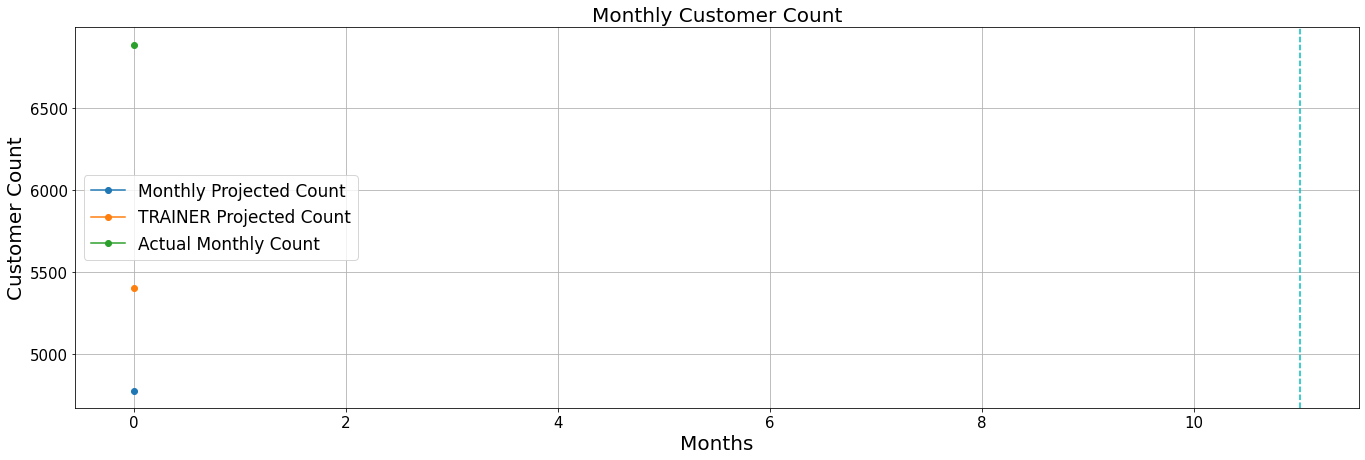

In [28]:
############################################################
# DISPLAYS GRAPH FOR VIEWING
# THE VERTICAL LINE IS THE LAST RECORDED **FULL** MONTH
############################################################
graph = dataFrame_month[:1].plot.line(figsize=(23, 7),style='.-',marker='o')
plt.xlabel("Months",size = 20)
plt.ylabel("Customer Count",size = 20)
plt.title('Monthly Customer Count', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.axvline(x=last_full_month, color = 'c', linestyle = '--')
graph.legend(fontsize=17,loc='best')
plt.grid(True)

In [ ]:
############################################################
# CREATES EXCEL EXPORT CALLED PROJECTIONS(*FILTER*)
############################################################
month_stats = pd.DataFrame({"Months":month_labels,"Monthly Count":monthly_projected_count,
filter + " Count":filter_projected_count,"Actual":actual_monthly_count})

# Create a Pandas Excel writer using XlsxWriter as the engine.
if (paid==1):
    writer = pd.ExcelWriter('Projections-' + filter+ '(PAID).xlsx', engine='xlsxwriter')
else:
    writer = pd.ExcelWriter('Projections-' + filter+ '(TOTAL).xlsx', engine='xlsxwriter')


# Write each dataframe to a different worksheet.
month_stats.to_excel(writer, sheet_name='Monthly')


# Close the Pandas Excel writer and output the Excel file.
writer.save()